## Examples

In [165]:
import numpy as np
import matplotlib.pyplot as plt

The function interp_plotter(x,y,X,option) below allows us to perform different types of interpolation of a specified set of data. In particular, interp_plotter(x,y,X,option) takes arrays x and y containing our experimental data as input, an X array input variable containing the data coordinates for which we will be interpolating on, and the input 'option' which specifies one of the following strings: 'linear', 'spline', or 'nearest'. Each option selection will correspond to whether the function performs linear, cubic spline, or nearest-nieghbor interpolation, respectively. The function uses scipy's build in interp1d, and allows us to call one of the three options by specifying the x, y, and X data, then produces a plot with the result. We assume that the x and X data are both in ascending order. 

In [163]:
from scipy.interpolate import interp1d

def interp_plotter(x,y,X,option):

        
        if option == 'nearest':  
            f = interp1d(x, y, kind='nearest')
            x_new = X
            y_new = f(X)
            y_hat = f(x)
            plt.plot(x_new, y_new, 'g')
            plt.plot(x, y_hat, 'bo')
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Nearest Interpolation of Data")
        
        elif option == 'linear': 
            f = interp1d(x, y, kind='linear')
            y_hat = f(x)
            plt.plot(x, y, 'g')
            plt.plot(x, y_hat, 'bo')
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Linear Interpolation of Data")
    
        elif option == 'cubic': 
            f = interp1d(x, y, kind='cubic')
            x_new = X
            y_new = f(X)
            y_hat = f(x)
            plt.plot(x_new, y_new, 'g')
            plt.plot(x, y_hat, 'bo')
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Cubic Interpolation of Data")

Test cases: 

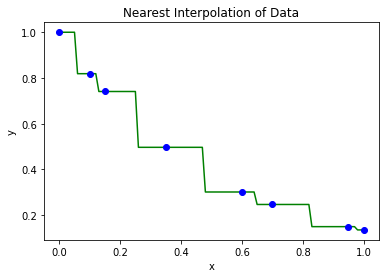

In [164]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])

interp_plotter(x, y, np.linspace(0, 1, 101), 'nearest')

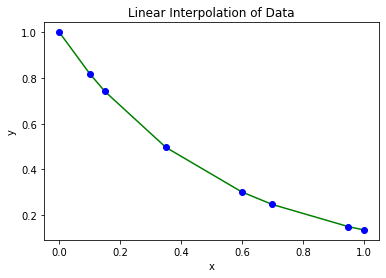

In [144]:
interp_plotter(x, y, np.linspace(0, 1, 101), 'linear')

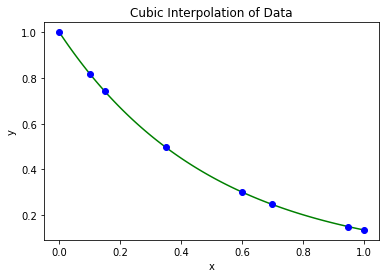

In [145]:
interp_plotter(x, y, np.linspace(0, 1, 101), 'cubic')

Below we write another interpolation function, largrange(x,y,X), which takes in array variables of experimental data x and y, and an array variable X which specifies points to be interpolated on. As the function name suggests, the algorithm below performs *Langrange Polynomial Interpolation* to find a curve that best fits the data points given in x and y. We perform the algorithm in a similar manner to the way in which Langrange polynomial interpolation is mathematically stated; that is as a linearly combination of the sum of finitely many Lagrange basis polynomials written as 

$$L(x) = \sum_{i=1}^{n}\left(y_{i}\prod_{j=1}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}\right),$$

where $L(x)$ is referred to as the Langrange polynomial. In particular, we define $P(x) = \prod_{j=1}^{n}\frac{x-x_{j}}{x_{i}-x_{j}} = 1$ whenever $i = j$, and $P(x) = 0$ otherwise. 

In the langrange(x,y,X) function below we use two for loops corresponding to the sum and product definition of the Langrange polynomial given above. Specifically, the outer loop computes the sum, while the inner loop computes the product. The assumption that if $i\neq j$ then $P(x) = 1$ is build into the algorithm as well. Additionally, we assume that both x and X are in ascending order, similar to the previous exercise. 

In [129]:
def lagrange(x,y,X):
    
    L = 0
    
    for i in range(len(x)):
        P = 1
        for j in range(len(x)):
            if i != j:
                P *= (X-x[j])/(x[i]-x[j])                       
        L += y[i]*P
    
       
    return L

Test cases:

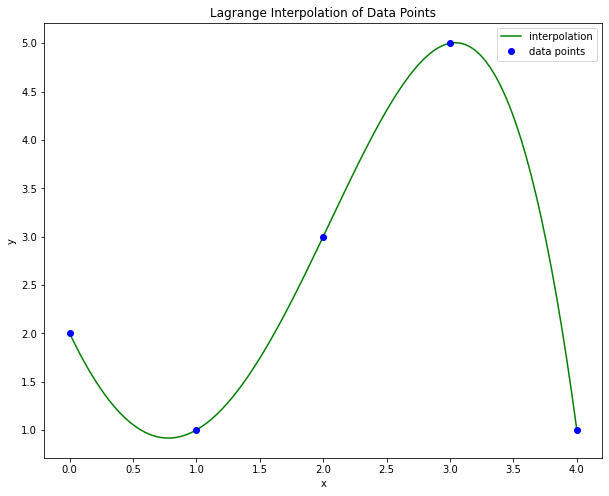

In [130]:
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

X = np.linspace(0, 4, 101)

plt.figure(figsize = (10,8))
plt.plot(X, lagrange(x, y, X), 'g', label = 'interpolation')
plt.plot(x, y, 'bo', label = 'data points')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Lagrange Interpolation of Data Points')
plt.legend()
plt.show()

Below we exhibit an example of fitting the data x = [0, 1, 2, 3, 4] and y = [3, 6, 8, 7, 1] using *Newton’s Polynomial Interpolation*. We first determine the necessary components by hand, then confirm our solution is correct using two functions: newton_poly_coeff(x,y) and newton_poly(a,xd,x). 

Because we have five elements in both our $x$ and $y$ data, it is clear that we will need a 4th degree polynomial to fit our data using Newton's Polynomial Interpolation. Thus, we seek to obtain a polynomial in the form 

$$f(x) = \sum_{i=0}^{4} \left(a_{i} \prod_{j=0}^{i-j} (x-x_{j})\right),$$

where the $a_{i}$s are our coefficeints. 

To begin, we first gather our coefficients using *The Method of Divided Difference*. It follows then that we have recursively 

\begin{alignat*}{5}
a_{0} &= y_{0} = 3\\
a_{1} &= \frac{y_{1} - a_{0}}{x_{1}-x_{0}} = 3\\
a_{2} &= \frac{\frac{y_{2}-y_{1}}{x_{2}-x_{1}}- a_{1}}{x_{2} - x_{0}} = -\frac{1}{2}\\
a_{3} &= \frac{\frac{\frac{y_{3} - y_{2}}{x_{3}-x_{2}} - \frac{y_{2} - y_{1}}{x_{2} - x_{1}} }{x_{3}-x_{1}} - a_{2}}{x_{3}-x_{0}} = -\frac{1}{3}\\
a_{4} &= 0,\\
\end{alignat*}

by repeated backward substitution through all values of $i\in\{0,\ldots,4\}$. Thus, our polynomial is 

\begin{alignat*}{2}
f(x) &=3 + (3)(x) + \left(-\frac{1}{2}\right)[(x)(x-1)] + \left(-\frac{1}{3}\right)[(x)(x-1)(x-2)]\\
&= -\frac{1}{3}x^{3} + \frac{1}{2}x^{2} + \frac{17}{6}x + 3.
\end{alignat*}

Where we obtain from our solution the curve we originally sought:

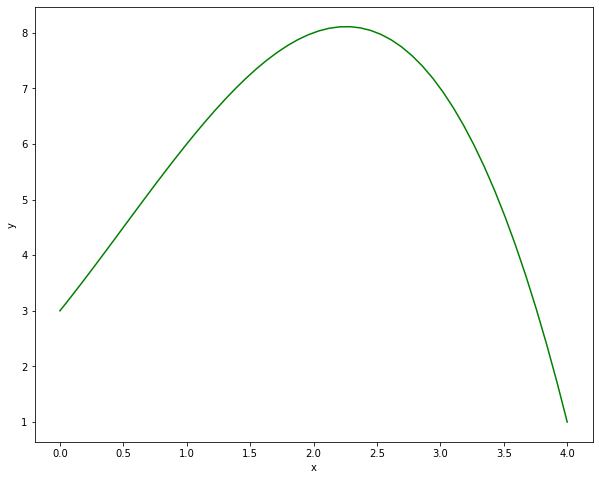

In [173]:
x = np.linspace(0,4)
y = (-1/3)*x**3 + (1/2)*x**2 + (17/6)*x + 3

plt.figure(figsize = (10,8))
plt.plot(x,y,'g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As mentioned previously, we now will exhibit code to confirm our solution above is correct. The function, newton_poly_coeff(x,y), first determines the necessary coefficients needed for our polynomial, then the function  newton_poly(a,xd,x) provides the polynomial to fit our data. It should be noted that the algorithm provided below is based on the assumption that all elements of our $x$ and $y$ data are int valued, as the below procedure does not work should we need float valued elements for our data points instead. Additionally, much like in our previous examples, it is assumed that the $x$ and $X$ values are in ascending order. 

In [166]:
def newton_poly_coeff(x,y):
    
    n = len(y)
    a = np.zeros([n,n])
    a[:,0] = y

    for k in range(1, n):
        for i in range(n-k):
            a[i][k] = (a[i+1][k-1] - a[i][k-1])/(x[i+k]-x[i])

    return a


def newton_poly(a,xd,x):

    n = len(xd)-1
    p = a[n]

    for i in range(1,n+1):
        p = a[n-i] + (x-xd[n-i])*p
        
    return p

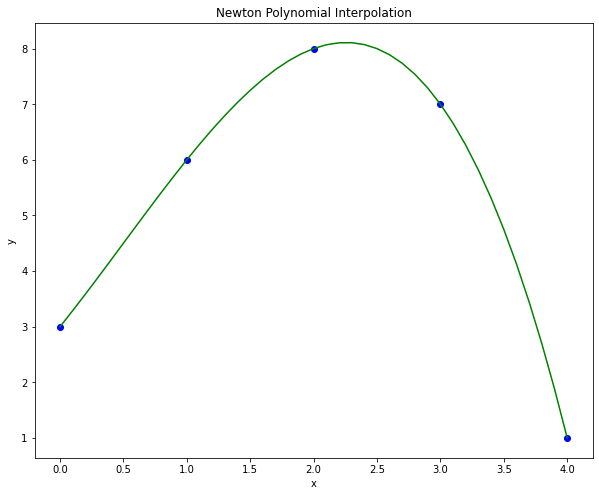

In [168]:
x = np.array([0,1,2,3,4]) 
y = np.array([3,6,8,7,1])
a_new = newton_poly_coeff(x,y)[0,:]
x_new = np.arange(0, 4.1, .1)
y_new = newton_polyn(a_new, x, x_new)

plt.figure(figsize = (10,8))
plt.plot(x,y,'bo')
plt.plot(x_new, y_new, 'g')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Newton Polynomial Interpolation')
plt.show()

## Additional Comments

The examples above show that there are several "flavors" of interpolation - some possibly better than others, depending on the circumstances. For instance, in the first example with the function interp_plotter(x,y,X,option), we can see the clearest difference in results of line fitting depending on which option we chose. In this example, we can observe that if a smoother curve which fits the data points is needed, then choosing either the 'linear' or 'nearest' option might not be sufficient. Instead, it is clear that a cubic spline interpolation might be best suited for the purposes previously mentioned. Additionally, much like the cubic spline, we saw in the later examples that we can also aquire a smooth curve which fits the data points with high accuracy when using either the lagrange(x,y,X) function, or the newton_poly(a,xd,x) function in combination with the newton_poly_coeff(x,y) function.